# **第10回　国際収支のデータサイエンス：世界銀行データの分析**

　第10回国際経済学デモでは、教科書13章に沿い、国際収支データを用いたデータサイエンス分析を行います。本例では、ライブラリwbgapiを用いて世界銀行データを取得し、統計分析します。



1.　パッケージのインストール

In [ ]:
pip install wbgapi

2.　ライブラリの読み込み

  　ここではデータ取得と分析に必要なライブラリをインポートします。今回使用するのはwbgapi、pandas_datareader、pandas、datetime、numpy、matplotlibの6種類です。

In [2]:
#[2]ライブラリの読み込み
import wbgapi as wb #世界銀行データ取得のためのライブラリ
import pandas_datareader as data #データ取得ライブラリ
import pandas as pd #データセット管理のためのライブラリ
import datetime #時系列データ管理のためのライブラリ
import numpy as np #統計処理のためのライブラリ
import matplotlib.pyplot as plt #図表作成のためのライブラリ

3．データコードの検索

　世界銀行データから国際収支統計を取得するためには、必要なデータのコードと国・地域コードが必要になります。まず、データコードの検索方法は次の通りです。本例では経常収支(Current Account)を検索します。

In [ ]:
#[3]データコードの検索
display(wb.series.info(q='portfolio'))

4．国・地域コードの検索

　次に、国・地域コードの検索方法は次の通りです。国・地域コードの場合は全コード一覧が表示されます。

In [ ]:
"[4]国コードの検索"
display(wb.economy.info())

5.　日本・米国・中国のISバランス対GDP比のデータ取得と分析

  　本例では日本、米国、中国の経常収支対GDP比のデータを取得し、可視化します。取得する国／地域を変更する場合は以下のセルの1行目、取得するデータを変更する場合はセルの2行目を書き換えてください。標本期間の変更は3行目の修正です。
  　標本期間を指定するのではなく、直近から数年間（mrv=  )という指示により、データを取得することも可能です（#4行目）。取得した複数の国のたデータは、最初は一列に並んでいるため、unstack()により国別のデータ配列に整形します。

In [ ]:
#[5]ISバランスデータの取得
countries = ["JPN","USA","CHN"] #国・地域コードの指定
indicators = {'BN.CAB.XOKA.GD.ZS'} #変数コードの指定
df=wb.data.DataFrame(indicators,countries, time=range(2000, 2023), skipBlanks=True, columns='series')
#df=wb.data.DataFrame(indicators,countries, mrv=5)
df.rename(columns={'BN.CAB.XOKA.GD.ZS': 'IS_Balance per GDP'},inplace=True) #変数名の修正
dfu = df.unstack(level=0) #データ配列の整形
dfu

6.　可視化と記述統計の算出

　得られた日米中3カ国のISバランスデータ（対GDP比）を、matplotlibによりを可視化します。2行目ではpandasにより記述統計を算出します。本グラフと記述統計が示しているのは、日本と中国のマクロ経済は国内貯蓄超過（＞国内投資）、米国は国内投資超過（＜国内貯蓄）という点です。「国際金融論」とは、この貯蓄超過国から投資超過国への資本流入形態、資本流入決定要因、を分析する経済ファイナンス理論です。重要な点は、米中新冷戦時代の到来により、2020年代は、中国資本の米国市場への流入が遮断され、「デカップリング」と称される状況が国際金融面から拍車がかけられていることです。

IS_Balance per GDP                      
economy                CHN        JPN        USA
count            23.000000  23.000000  23.000000
mean              3.231820   2.917674  -3.427429
std               2.665034   1.062351   1.287816
min               0.173667   0.742322  -5.911019
25%               1.694021   2.369825  -4.366160
50%               2.253294   3.070280  -2.918621
75%               3.716250   3.757623  -2.192816
max               9.947889   4.623300  -1.887394

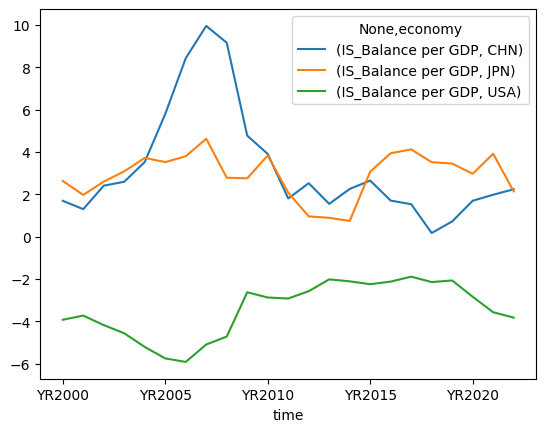

In [4]:
#[6]可視化と記述統計
dfu.plot();
dfu.describe()

7　金融収支データの取得と分析

7.1　　対内証券投資データの取得

　金融収支は、経常収支とともに、重要な国際収支項目です。以下は、国内投資超過（＝国内貯蓄不足）の米国への海外からの対内証券投資を可視化しています。2016年のトランプ政権以降、流入規模は拡大するものの、流出（米国株式の売却）も度々大規模に発生していることがわかります。

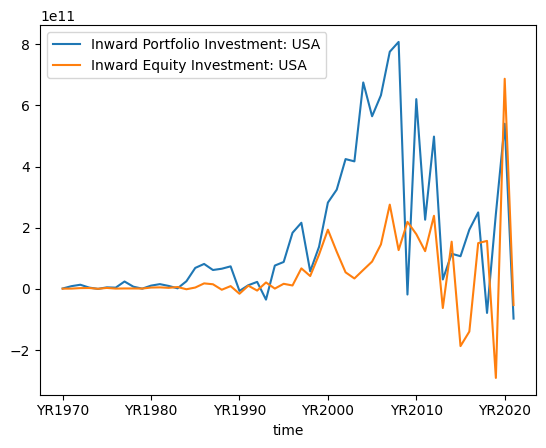

In [14]:
#[7]対米株式投資(10億USD)
countries = ["USA"]
indicators = {'BN.KLT.PTXL.CD','BX.PEF.TOTL.CD.WD'}
df=wb.data.DataFrame(indicators,countries, time=range(1970, 2022), skipBlanks=True, columns='series')
df['BN.KLT.PTXL.CD']=df['BN.KLT.PTXL.CD']*(-1)
df.rename(columns={'BN.KLT.PTXL.CD':'Inward Portfolio Investment: USA','BX.PEF.TOTL.CD.WD': 'Inward Equity Investment: USA'},inplace=True) #変数名の修正
df.plot();

7.2　　世界150カ国ISバランス・リーグテーブルの作成

　最後に、世界ではどの国が貯蓄超過（資本供給国）であり、どの国が投資超過国（資本受入国）であるのかを確認するため、ISバランス（対GDP比）のリーグテーブルの作成手順を説明します。以下の例は世界銀行データの2020年のみのデータを用い、2行目で大きい順から小さい順へ並べ替えています。

In [ ]:
#[8]世界150カ国のISバランス(対GDP比)データの取得と並べ替え
df=wb.data.DataFrame('BX.PEF.TOTL.CD.WD', time=2020, labels=True)
df_s = df.sort_values(by="BX.PEF.TOTL.CD.WD", ascending=False).head(150)
df_s.rename(columns={'BX.PEF.TOTL.CD.WD': 'Inward Equity'},inplace=True) #変数名の修正
df_s